<a href="https://colab.research.google.com/github/NapoliD/Association-Rule-Learning/blob/master/Analytics_v1_Metricas_Duras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/') 

Mounted at /content/drive/


In [2]:
import os
os.chdir('/content/drive/My Drive/Telecentro/Datos')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)
import seaborn as sns
import statistics


In [4]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

Cargamos Data

In [6]:
data_total = pd.read_csv('cmts_nov.csv',encoding='latin-1',decimal='.',thousands=',')
data = pd.read_csv('ultimos_7_dias.csv',encoding='latin-1',decimal='.',thousands=',')
data_capital = data.loc[:,['cmts','fecha_hora','inMbps','cmFecUsPreUs','dia','hora']]
data_capital.head(10)


,cmts,fecha_hora,inMbps,cmFecUsPreUs,dia,hora
0,AP-CBR8-CMTS-10,2020-11-12 11:10:31.000,9308.0,1.3,12,11
1,AP-CBR8-CMTS-10,2020-11-12 11:15:30.000,9308.0,1.3,12,11
2,AP-CBR8-CMTS-10,2020-11-12 11:20:30.000,9602.0,1.3,12,11
3,AP-CBR8-CMTS-10,2020-11-12 11:25:28.000,9558.0,1.8,12,11
4,AP-CBR8-CMTS-10,2020-11-12 11:30:28.000,9528.0,1.8,12,11
5,AP-CBR8-CMTS-10,2020-11-12 11:35:27.000,9528.0,1.7,12,11
6,AP-CBR8-CMTS-10,2020-11-12 11:40:26.000,9774.0,1.7,12,11
7,AP-CBR8-CMTS-10,2020-11-12 11:45:25.000,9774.0,1.5,12,11
8,AP-CBR8-CMTS-10,2020-11-12 11:50:24.000,10621.0,1.5,12,11
9,AP-CBR8-CMTS-10,2020-11-12 11:55:24.000,10621.0,1.6,12,11


In [7]:
data_capital.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,inMbps,cmFecUsPreUs,dia,hora
count,79102.000000,79102.000000,79102.000000,79102.000000
mean,6579.117658,4.084438,15.399434,11.572438
std,5604.705851,2.893683,2.022339,6.978538
min,0.000000,0.000000,12.000000,0.000000
25%,2234.000000,1.600000,14.000000,5.000000
50%,5009.000000,3.800000,15.000000,12.000000
75%,9855.750000,5.800000,17.000000,18.000000
max,31196.000000,42.800000,19.000000,23.000000


In [8]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,inMbps,cmFecUsPreUs,mes,dia,hora
count,79102.000000,79102.000000,79102.000000,79102.000000,79102.000000
mean,6579.117658,4.084438,11.000000,15.399434,11.572438
std,5604.705851,2.893683,0.000000,2.022339,6.978538
min,0.000000,0.000000,11.000000,12.000000,0.000000
25%,2234.000000,1.600000,11.000000,14.000000,5.000000
50%,5009.000000,3.800000,11.000000,15.000000,12.000000
75%,9855.750000,5.800000,11.000000,17.000000,18.000000
max,31196.000000,42.800000,11.000000,19.000000,23.000000


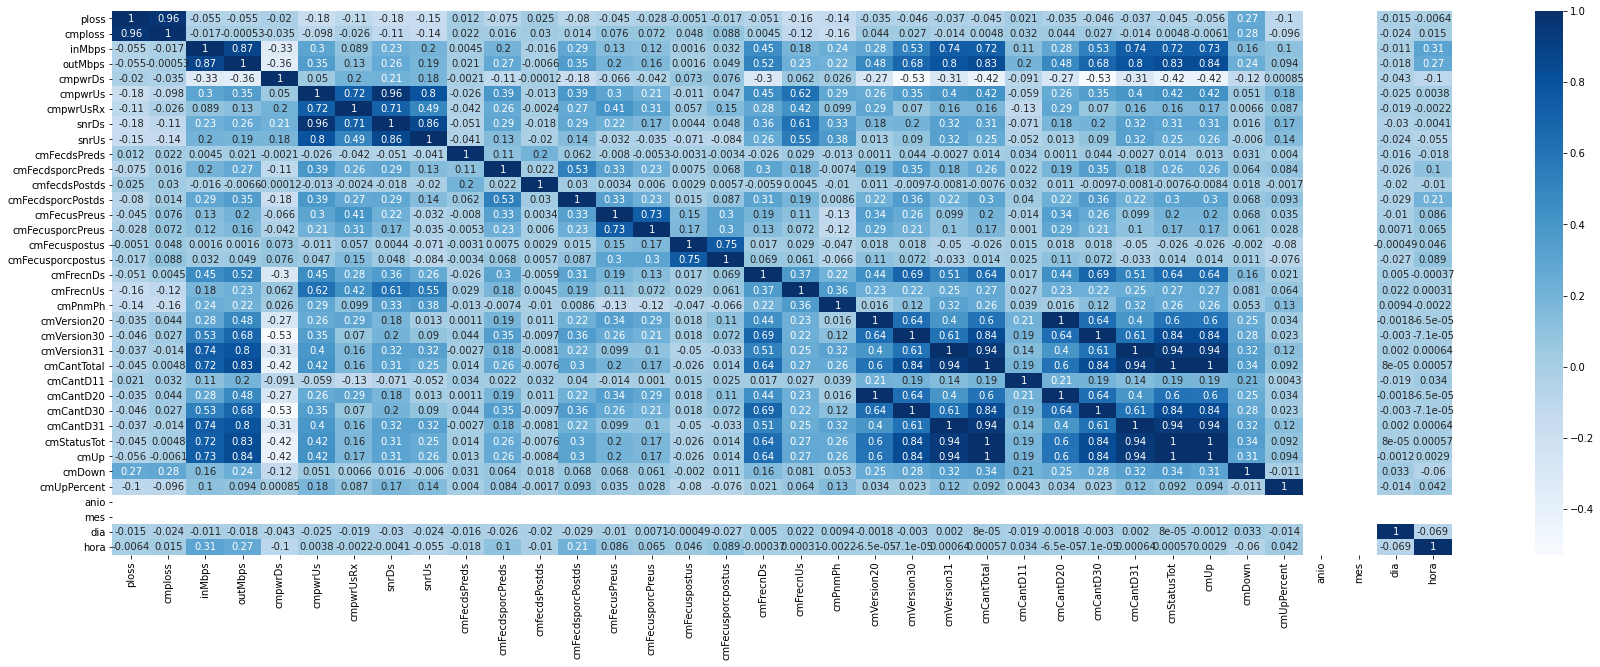

In [9]:
correlacion=data_total #.loc[:, ['cmFecusPreus','cmFecusporcPreus','cmFecuspostus','cmFecusporcpostus']]
corelation=correlacion.corr()
plt.figure(figsize = (30,10))
sns.heatmap(corelation, cmap="Blues",annot=True)

Analizamos valores nulos

In [10]:
#Analizamos valores nulos
vars_with_na = [
    var for var in data.columns
    if data[var].isnull().sum() > 0 or data[var].dtypes != 'O'
]

# print percentage of missing values per variable
data[vars_with_na].isnull().mean()

inMbps          0.0
cmFecUsPreUs    0.0
mes             0.0
dia             0.0
hora            0.0
dtype: float64

Armamos modelo estadístico 

In [11]:
statistics=pd.DataFrame(data_capital.groupby(['cmts','dia','hora']).agg(['mean','median','min', 'max', 'std'])).reset_index(inplace=False)
statistics.columns = [' '.join(col).strip() for col in statistics.columns.values]
statistics.head(5)

,cmts,dia,hora,inMbps mean,inMbps median,inMbps min,inMbps max,inMbps std,cmFecUsPreUs mean,cmFecUsPreUs median,cmFecUsPreUs min,cmFecUsPreUs max,cmFecUsPreUs std
0,AP-CBR8-CMTS-10,12,11,9762.200000,9580.0,9308.0,10621.0,479.004709,1.550000,1.55,1.3,1.8,0.201384
1,AP-CBR8-CMTS-10,12,12,10723.500000,10637.0,10543.0,11145.0,190.190574,1.700000,1.70,1.4,2.0,0.200000
2,AP-CBR8-CMTS-10,12,13,11356.153846,11202.0,10440.0,12360.0,666.370623,1.753846,1.70,1.6,2.0,0.133012
3,AP-CBR8-CMTS-10,12,14,12880.750000,12907.0,12054.0,13822.0,533.648867,1.866667,1.80,1.6,2.3,0.238683
4,AP-CBR8-CMTS-10,12,15,12827.083333,12802.5,12523.0,13155.0,257.748806,2.283333,2.40,1.9,2.6,0.258785


In [12]:
statistics.columns

Index(['cmts', 'dia', 'hora', 'inMbps mean', 'inMbps median', 'inMbps min',
       'inMbps max', 'inMbps std', 'cmFecUsPreUs mean', 'cmFecUsPreUs median',
       'cmFecUsPreUs min', 'cmFecUsPreUs max', 'cmFecUsPreUs std'],
      dtype='object')

In [13]:
statistics['hora_menos_uno']= np.where(statistics['hora']!=23,statistics['hora']+1,0)
statistics['dia_menos_uno']= np.where((statistics['hora_menos_uno']==0) & (statistics['dia']!=1) ,statistics['dia']+1,statistics['dia'])


In [15]:
statistics.head(5)

,cmts,dia,hora,inMbps mean,inMbps median,inMbps min,inMbps max,inMbps std,cmFecUsPreUs mean,cmFecUsPreUs median,cmFecUsPreUs min,cmFecUsPreUs max,cmFecUsPreUs std,hora_menos_uno,dia_menos_uno
0,AP-CBR8-CMTS-10,12,11,9762.200000,9580.0,9308.0,10621.0,479.004709,1.550000,1.55,1.3,1.8,0.201384,12,12
1,AP-CBR8-CMTS-10,12,12,10723.500000,10637.0,10543.0,11145.0,190.190574,1.700000,1.70,1.4,2.0,0.200000,13,12
2,AP-CBR8-CMTS-10,12,13,11356.153846,11202.0,10440.0,12360.0,666.370623,1.753846,1.70,1.6,2.0,0.133012,14,12
3,AP-CBR8-CMTS-10,12,14,12880.750000,12907.0,12054.0,13822.0,533.648867,1.866667,1.80,1.6,2.3,0.238683,15,12
4,AP-CBR8-CMTS-10,12,15,12827.083333,12802.5,12523.0,13155.0,257.748806,2.283333,2.40,1.9,2.6,0.258785,16,12


In [16]:
data_capital['hora_menos_uno']=data_capital['hora']
data_capital['dia_menos_uno']=data_capital['dia']

In [17]:
data_capital = pd.merge(data_capital,
                 statistics,
                 on=['cmts','dia_menos_uno','hora_menos_uno'])


In [18]:
# Cant cmts
cant_ctms=pd.DataFrame(data_capital['cmts'].unique()).count()
cant_ctms[0]

40

In [19]:
data_capital.columns

Index(['cmts', 'fecha_hora', 'inMbps', 'cmFecUsPreUs', 'dia_x', 'hora_x',
       'hora_menos_uno', 'dia_menos_uno', 'dia_y', 'hora_y', 'inMbps mean',
       'inMbps median', 'inMbps min', 'inMbps max', 'inMbps std',
       'cmFecUsPreUs mean', 'cmFecUsPreUs median', 'cmFecUsPreUs min',
       'cmFecUsPreUs max', 'cmFecUsPreUs std'],
      dtype='object')

In [20]:
data_capital.head(5)

,cmts,fecha_hora,inMbps,cmFecUsPreUs,dia_x,hora_x,hora_menos_uno,dia_menos_uno,dia_y,hora_y,inMbps mean,inMbps median,inMbps min,inMbps max,inMbps std,cmFecUsPreUs mean,cmFecUsPreUs median,cmFecUsPreUs min,cmFecUsPreUs max,cmFecUsPreUs std
0,AP-CBR8-CMTS-10,2020-11-12 12:00:23.000,10637.0,1.6,12,12,12,12,12,11,9762.2,9580.0,9308.0,10621.0,479.004709,1.55,1.55,1.3,1.8,0.201384
1,AP-CBR8-CMTS-10,2020-11-12 12:05:21.000,10637.0,1.4,12,12,12,12,12,11,9762.2,9580.0,9308.0,10621.0,479.004709,1.55,1.55,1.3,1.8,0.201384
2,AP-CBR8-CMTS-10,2020-11-12 12:10:21.000,10585.0,1.4,12,12,12,12,12,11,9762.2,9580.0,9308.0,10621.0,479.004709,1.55,1.55,1.3,1.8,0.201384
3,AP-CBR8-CMTS-10,2020-11-12 12:15:20.000,10585.0,1.8,12,12,12,12,12,11,9762.2,9580.0,9308.0,10621.0,479.004709,1.55,1.55,1.3,1.8,0.201384
4,AP-CBR8-CMTS-10,2020-11-12 12:20:18.000,10574.0,1.8,12,12,12,12,12,11,9762.2,9580.0,9308.0,10621.0,479.004709,1.55,1.55,1.3,1.8,0.201384


Creación de filtros duros

In [21]:
result = [] 
for dato,maximo,minimo,mediana,promedio in zip(data_capital["cmFecUsPreUs"],data_capital["cmFecUsPreUs max"],data_capital["cmFecUsPreUs min"],data_capital["cmFecUsPreUs median"],data_capital['cmFecUsPreUs mean']):
    if (dato*0.70) > maximo or (dato*0.70)>mediana  : 
        result.append("1") 
    elif (minimo*1.30) > dato or (dato*1.30)<mediana: 
        result.append("1") 
    else: 
        result.append("0") 
       
data_capital["cmFecusPreus_alerta"] = result 

result = [] 
for dato,maximo,minimo,mediana,promedio in zip(data_capital["inMbps"],data_capital["inMbps max"],data_capital["inMbps min"],data_capital["inMbps median"],data_capital['inMbps mean']):
    if (dato*0.70) > maximo or (dato*0.70)>mediana: 
        result.append("1") 
    elif dato > (minimo*1.30)  or (dato*1.30)<mediana : 
        result.append("1") 
    else: 
        result.append("0") 
       
data_capital["inMbps_alerta"] = result 

Aplicamos ISOLATIONFOREST a cmFecUsPreUs

In [22]:
data_capital_cmFecUsPreUs=data_capital.loc[:,['cmts','fecha_hora','cmFecUsPreUs']]

In [ ]:
# Isolate Forest
# create a dataframe 
df = pd.DataFrame(data_capital) 
  
# group by "X" column 
groups = df.groupby('cmts') 
  
# extract keys from groups 
keys = groups.groups.keys() 

model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
prediccion=[]
for nodos in keys:
  
  entrena=data_capital_cmFecUsPreUs[data_capital_cmFecUsPreUs['cmts']==nodos]
  model.fit(entrena[['cmFecUsPreUs']])
  entrena['scores_cmFecUsPreUs']=model.decision_function(entrena[['cmFecUsPreUs']])
  prediccion.append(entrena)

datos_inicio=pd.DataFrame(prediccion[0])
loop=[1,2,3]
for i in range(cant_ctms[0]):
  datos_inicio=datos_inicio.append(pd.DataFrame(prediccion[i]),ignore_index = True)
  #datos_finales=pd.concat(datos_inicio.reset_index(drop=True),pd.DataFrame(prediccion[i]).reset_index(drop=True))
data_capital_cmFecUsPreUs.shape

In [25]:
data_capital.shape

(78670, 22)

In [ ]:
data_capital

In [28]:
data_capital_cmFecUsPreUs.shape

(78670, 3)

In [29]:
data_capital = pd.merge(data_capital,
                 datos_inicio,
                 on=['cmts','fecha_hora'])


In [30]:
data_capital.head(5)

,cmts,fecha_hora,inMbps,cmFecUsPreUs_x,dia_x,hora_x,hora_menos_uno,dia_menos_uno,dia_y,hora_y,inMbps mean,inMbps median,inMbps min,inMbps max,inMbps std,cmFecUsPreUs mean,cmFecUsPreUs median,cmFecUsPreUs min,cmFecUsPreUs max,cmFecUsPreUs std,cmFecusPreus_alerta,inMbps_alerta,cmFecUsPreUs_y,scores_cmFecUsPreUs_x,cmFecUsPreUs,scores_cmFecUsPreUs_y
0,AP-CBR8-CMTS-10,2020-11-12 12:00:23.000,10637.0,1.6,12,12,12,12,12,11,9762.2,9580.0,9308.0,10621.0,479.004709,1.55,1.55,1.3,1.8,0.201384,1,0,1.6,-0.121786,1.6,-0.121786
1,AP-CBR8-CMTS-10,2020-11-12 12:00:23.000,10637.0,1.6,12,12,12,12,12,11,9762.2,9580.0,9308.0,10621.0,479.004709,1.55,1.55,1.3,1.8,0.201384,1,0,1.6,-0.121786,1.6,-0.121786
2,AP-CBR8-CMTS-10,2020-11-12 12:00:23.000,10637.0,1.6,12,12,12,12,12,11,9762.2,9580.0,9308.0,10621.0,479.004709,1.55,1.55,1.3,1.8,0.201384,1,0,1.6,-0.121786,1.6,-0.121786
3,AP-CBR8-CMTS-10,2020-11-12 12:00:23.000,10637.0,1.6,12,12,12,12,12,11,9762.2,9580.0,9308.0,10621.0,479.004709,1.55,1.55,1.3,1.8,0.201384,1,0,1.6,-0.121786,1.6,-0.121786
4,AP-CBR8-CMTS-10,2020-11-12 12:05:21.000,10637.0,1.4,12,12,12,12,12,11,9762.2,9580.0,9308.0,10621.0,479.004709,1.55,1.55,1.3,1.8,0.201384,1,0,1.4,-0.164588,1.4,-0.164588


In [32]:
datos_inicio.head(5)

,cmts,fecha_hora,cmFecUsPreUs,scores_cmFecUsPreUs
0,AP-CBR8-CMTS-10,2020-11-12 12:00:23.000,1.6,-0.121786
1,AP-CBR8-CMTS-10,2020-11-12 12:05:21.000,1.4,-0.164588
2,AP-CBR8-CMTS-10,2020-11-12 12:10:21.000,1.4,-0.164588
3,AP-CBR8-CMTS-10,2020-11-12 12:15:20.000,1.8,-0.056434
4,AP-CBR8-CMTS-10,2020-11-12 12:20:18.000,1.8,-0.056434


In [ ]:
data_capital.to_csv('1er_prototipo_anomalias_caba.csv',encoding='latin-1',decimal=',')

Aplicamos ISOLATIONFOREST a inMbps

In [ ]:
llamadosxhora=60/5
llamadosxdia=llamadosxhora*24
llamadosxmes=llamadosxdia*30

print(f'calls por hora :  {llamadosxhora}')
print(f'calls por dia :  {llamadosxdia}')
print(f'calls al mes :  {llamadosxmes}')

rowsxhora=(60/5)*120
rowsxdia=rowsxhora*24
rowsxmes=rowsxdia*11

print(f'rows por hora :  {rowsxhora}')
print(f'rows por dia :  {rowsxdia}')
print(f'rows al mes :  {rowsxmes}')


calls por hora :  12.0
calls por dia :  288.0
calls al mes :  8640.0
rows por hora :  1440.0
rows por dia :  34560.0
rows al mes :  380160.0


In [ ]:
sns.pairplot(data_capital)